In [1]:
import os
import json 
import argparse
import numpy as np
import math
import pickle
import datetime
import time
import logging
import itertools

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

You can specify an URL to an image:

In [2]:
url = 'https://cdn.topofart.com/images/artists/John_Singer_Sargent/paintings/sargent029.jpg'
import urllib.request
urllib.request.urlretrieve(url, "input_img.jpg")
imgpath = os.path.abspath("input_img.jpg")

Or specify an image from the styletransfer art dataset:

In [3]:
imgpath = '/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000000785_050351.jpg'

Show the loaded image:

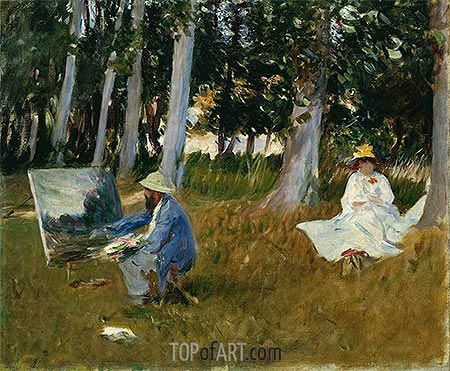

In [3]:
from IPython.display import Image, display
display(Image(filename=imgpath))

Optional: Select a sub-region of the image for partial image search

Output()

<IPython.core.display.Javascript object>


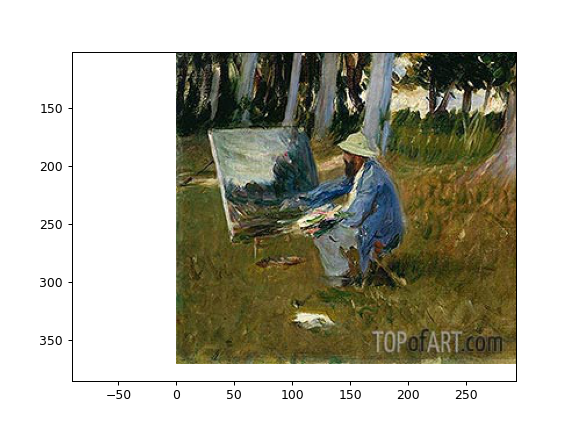

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.widgets as widgets
from predict_search_modules import cropImage

from ipywidgets import Output
output = Output()
display(output)

@output.capture()
def onselect(eclick, erelease, resize=True):
    global imgpath
    if eclick.ydata>erelease.ydata:
        eclick.ydata,erelease.ydata=erelease.ydata,eclick.ydata
    if eclick.xdata>erelease.xdata:
        eclick.xdata,erelease.xdata=erelease.xdata,eclick.xdata
    p1 = [eclick.xdata, eclick.ydata]
    p2 = [erelease.xdata, erelease.ydata]
   
    ax.set_ylim(erelease.ydata,eclick.ydata)
    ax.set_xlim(eclick.xdata,erelease.xdata)
    #fig.canvas.draw(eclick.xdata,erelease.xdata) 
    
    imgpath = cropImage(imgpath, p1, p2, resize=resize)

fig = plt.figure()
ax = fig.add_subplot(111)
im = Image.open(imgpath)
arr = np.asarray(im)
plt_image=plt.imshow(arr)
rs=widgets.RectangleSelector(
    ax, onselect, drawtype='box',
    rectprops = dict(facecolor='red', edgecolor = 'black', alpha=0.5, fill=True))
plt.show()


Infer the scene graph from the image & Visualize the result:

In [5]:
from predict_search_modules import predict_scenegraph, visualize_scenegraph

annpath = predict_scenegraph(imgpath)

filterlabels = True #False
imgpath, anns = visualize_scenegraph(annpath, filterlabels)
print(imgpath)
display(Image(filename=imgpath))

with open(anns, 'r') as f:
    print(f.read())


/home/althausc/master_thesis_impl/scripts/branchgraphs/input_img.jpg
SCENE GRAPH PREDICTION ...


RuntimeError: Scene graph prediction failed.

Filter out best predictions & Transform into Graph2Vec input format:

In [4]:
from predict_search_modules import transform_into_g2vformat

annpath = 'test'
relsasnodes = True
graphfile = transform_into_g2vformat(annpath,relsasnodes)

TRANSFORM PREDICTIONS INTO GRAPH2VEC FORMAT ...


RuntimeError: Transform predictions failed.

Search best matching image (respectively graph) from previous trained model:

In [11]:
from predict_search_modules import search_topk
k = 10
rw = False #True
rm = 'jaccard' #'euclid' 
graphfile = ''
filetopk = search_topk(graphfile, k, reweight=rw, r_mode=rm)


GRAPH2VEC PREDICTION & RETRIEVAL ...
GRAPH2VEC PREDICTION & RETRIEVAL DONE.
Results:  [['g_/home/althausc/nfs/data/styleimgs_test/styles/75379.jpg', 0.07508829236030579], ['g_/home/althausc/nfs/data/styleimgs_test/styles/62187.jpg', 0.05341362580657005], ['g_/home/althausc/nfs/data/styleimgs_test/styles/92741.jpg', -0.02689141035079956]]


Show images in ranking:

Reading from file:  /home/althausc/master_thesis_impl/retrieval/out/scenegraphs/09/25_16-17-38/topkresults.json
['g_/home/althausc/nfs/data/styleimgs_test/styles/75379.jpg', 0.07508829236030579]
['g_/home/althausc/nfs/data/styleimgs_test/styles/62187.jpg', 0.05341362580657005]
['g_/home/althausc/nfs/data/styleimgs_test/styles/92741.jpg', -0.02689141035079956]
4 3
['Query Image', 0.07508829236030579, 0.05341362580657005, -0.02689141035079956]



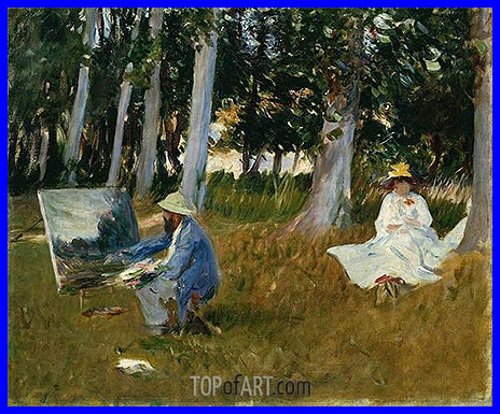
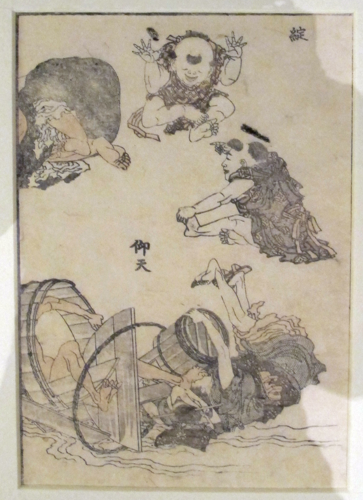
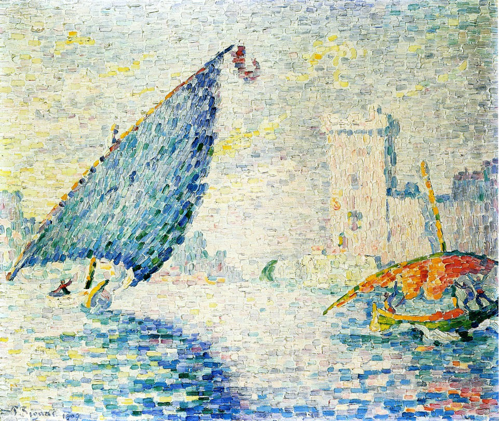

In [12]:
import ipyplot
from predict_search_modules import getImgs, treshIndex, drawborder

imgs, scores = getImgs(filetopk)
queryim = drawborder(imgpath)
imgs.insert(0,queryim)

tresh = 0.01
k = treshIndex(tresh, filetopk) + 1
print(len(imgs), k)

ipyplot.plot_images(imgs[:k], labels=None, scores=scores[:k], max_images=30, img_width=250)

In [8]:
%load_ext autoreload
%autoreload 2